In [2]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def func_1(x):
    return 3-2*np.sum(x)

def func_2(x):
    return 3*x[0]*x[1] + 3*x[0]*x[2] + 3*x[1]*x[2] - 4*x[0] - 4*x[1] - 4*x[2] + 3

def func_3(x):
    return 3*x[0]*x[1] + 3*x[0]*x[2] + 3*x[1]*x[2] - 2*x[0] - 2*x[1] - 2*x[2] + 1

def func_1_flip(x):
    return -1*func_1(x)

def func_2_flip(x):
    return -1*func_2(x)

def func_3_flip(x):
    return -1*func_3(x)

# Constraint functions
def constraint_1(x):
    return 1 - x[0] - x[1]

def constraint_2(x):
    return 1 - x[0] - x[2]

def constraint_3(x):
    return 1 - x[1] - x[2]

def run_function_with_constraints(func, constraints):
    bounds = [(0.0, 1.0)] * 3
    num_starts = 30
    results = []
    
    # Perform multiple minimizations with different initial guesses
    for _ in range(num_starts):
        initial_guess = np.random.rand(3)
        result = minimize(func, initial_guess, bounds=bounds, constraints=constraints)
        results.append(result)
    
    # Find the best result (minimum value of f)
    return min(results, key=lambda x: x.fun)

def run_function(func):
    constraints = [{'type': 'ineq', 'fun': constraint_1},
                   {'type': 'ineq', 'fun': constraint_2},
                   {'type': 'ineq', 'fun': constraint_3}]
    return run_function_with_constraints(func, constraints)

def run_function_with_constraint(func, a):
    constraints = [{'type': 'ineq', 'fun': constraint_1},
                   {'type': 'ineq', 'fun': constraint_2},
                   {'type': 'ineq', 'fun': constraint_3},
                   {'type': 'eq', 'fun': lambda x : (func_1(x) - a)}]
    return run_function_with_constraints(func, constraints)

def run_function_with_double_constraint(func,a,b):
    constraints = [{'type': 'ineq', 'fun': constraint_1},
                   {'type': 'ineq', 'fun': constraint_2},
                   {'type': 'ineq', 'fun': constraint_3},
                   {'type': 'eq', 'fun': lambda x : (func_1(x) - a)},
                   {'type': 'eq', 'fun': lambda x : (func_2(x) - b)}]
    return run_function_with_constraints(func, constraints)

In [7]:
result_min = run_function(func_1)
result_max = run_function(func_1_flip)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

Minimum value found: -5.1514348342607263e-14
Achieved at: [0.5 0.5 0.5]
Maximum value found: 3.0
Achieved at: [0.00e+00 1.11e-16 0.00e+00]


In [ ]:
result_min = run_function(func_2)
result_max = run_function(func_2_flip)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

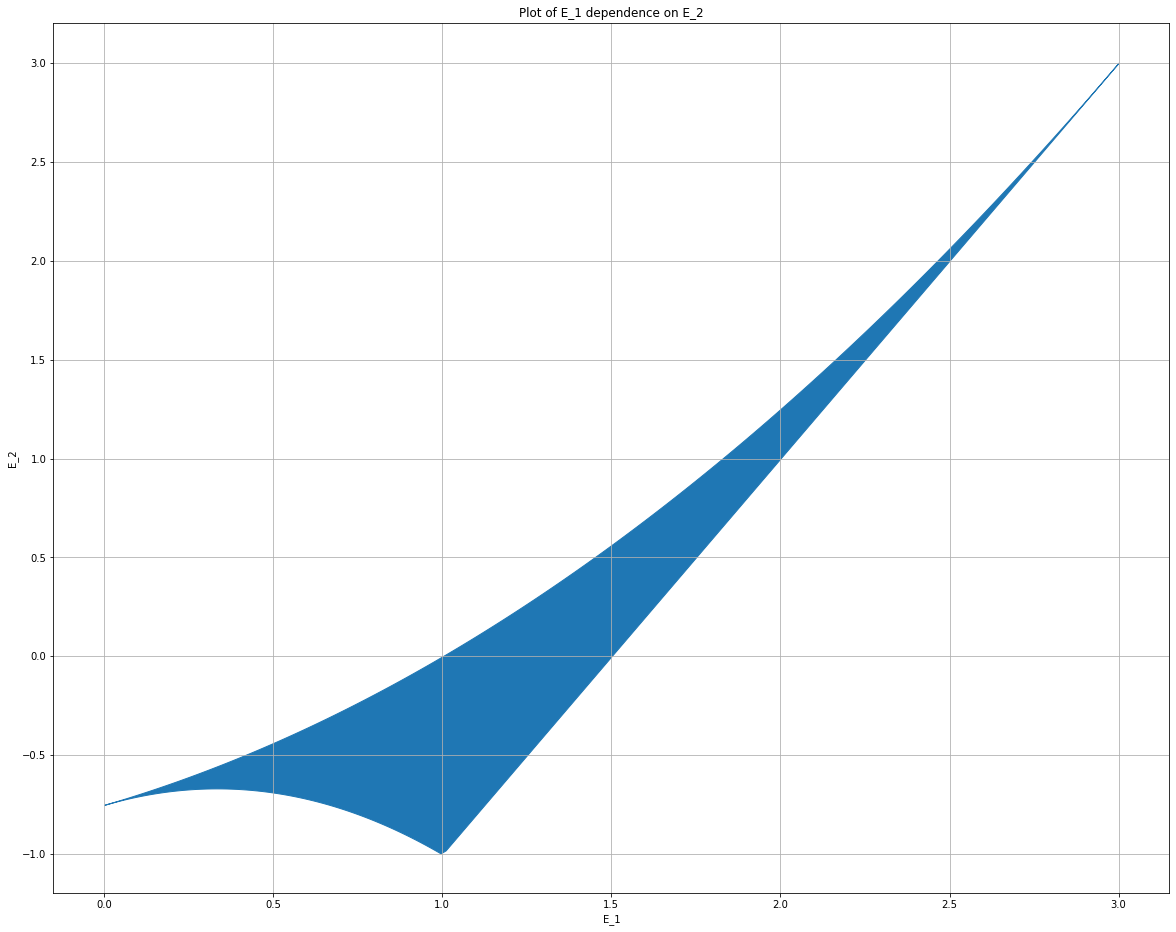

In [3]:
# Generate x values from 0 to 3
x_values = np.linspace(0, 3, 200)

# Calculate corresponding y values
min_y_values = [run_function_with_constraint(func_2, x).fun for x in x_values]
max_y_values = [-1*run_function_with_constraint(func_2_flip, x).fun for x in x_values]

# Plot the function
plt.figure(figsize=(20, 16))
plt.fill_between(x_values, min_y_values, max_y_values, interpolate=True, label='E_1 dependence on E_2', color='C0')

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')


Done


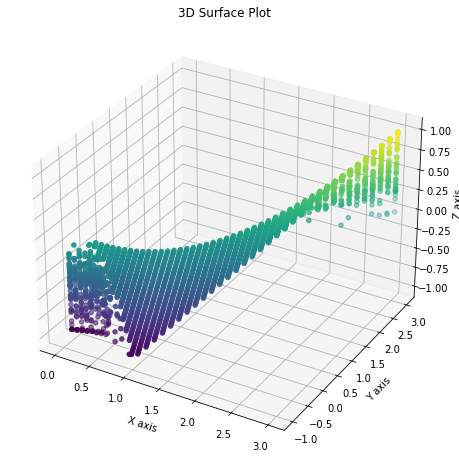

In [14]:
# Define the functions for y and z
def func_y(x):
    return np.sin(x)

def func_z(x, y):
    return run_function_with_double_constraint(func_3,x,y).fun

# Generate data points
x_values = np.linspace(0, 3, 50)

min_y_values = [run_function_with_constraint(func_2, x).fun for x in x_values]
max_y_values = [-1*run_function_with_constraint(func_2_flip, x).fun for x in x_values]

# Create lists to store meshgrid points
X_mesh = []
Y_mesh = []

# Generate meshgrid points
i=0
for xi in x_values:
    y_lower_val = min_y_values[i]
    y_upper_val = max_y_values[i]
    i = i+1
    y_vals = np.linspace(y_lower_val, y_upper_val, 50)
    X_mesh.append(np.full_like(y_vals, xi))
    Y_mesh.append(y_vals)

X = np.concatenate(X_mesh)
Y = np.concatenate(Y_mesh)

print("Done")

Z = np.vectorize(func_z)(X,Y)

# Plot
fig = plt.figure(figsize=(10, 8))  # Adjust the figure size here (width, height)
ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z , c=Z, cmap='viridis')

# Customize labels
ax.set_title('3D Surface Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()